[handson-ml2](https://github.com/ageron/handson-ml2)

In [1]:
%matplotlib inline

(60, 3)
1.2438654067885826
-1.2051232064119164


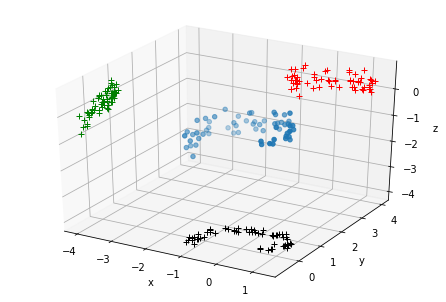

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.2

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)
print(X.shape)
print(X.max())
print(X.min())


# https://stackoverflow.com/questions/29549905/pylab-3d-scatter-plots-with-2d-projections-of-plotted-data
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x, y, z)

ax.plot(x, z, 'r+', zdir='y', zs=4)
ax.plot(y, z, 'g+', zdir='x', zs=-4)
ax.plot(x, y, 'k+', zdir='z', zs=-4)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

(60, 3) (3,) (3, 3)
(3, 3)
True
(60, 3)


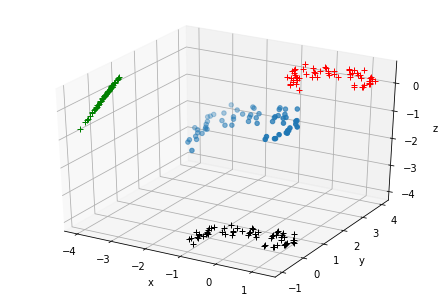

In [12]:
import copy

X_ = (X - X.mean(axis=0)) / X.std(axis=0) 

U, s, Vt = np.linalg.svd(X_, full_matrices=False)
print(U.shape, s.shape, Vt.shape)

S = np.diag(s)
print(S.shape)

print(np.allclose(X_, U@S@Vt))

Vt2 = copy.deepcopy(Vt)
Vt2[2, :] = 0
X2 = (U@S@Vt2 + X.mean(axis=0)) * X.std(axis=0) 
print(X2.shape)


# https://stackoverflow.com/questions/29549905/pylab-3d-scatter-plots-with-2d-projections-of-plotted-data
x = X2[:, 0]
y = X2[:, 1]
z = X2[:, 2]

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x,y,z)

ax.plot(x, z, 'r+', zdir='y', zs=4)
ax.plot(y, z, 'g+', zdir='x', zs=-4)
ax.plot(x, y, 'k+', zdir='z', zs=-4)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()